In [1]:
import torch


In [2]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))


In [3]:
bias

tensor([[0.3177]])

In [4]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
from torch import nn
from torch import optim

# 784 = 28x28 dimensions in each image
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
# i epoch is one pass over the entire training set
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()
        
        # Forward pass, calculate loss using criterion, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.878398874166932
Training loss: 0.8376095306390384
Training loss: 0.5356745653505772
Training loss: 0.43898278368370874
Training loss: 0.3920835955247188


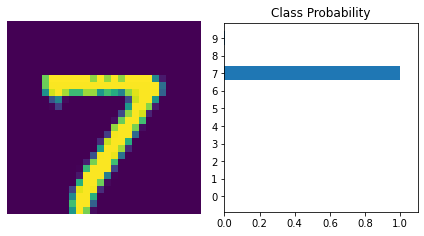

In [17]:
%matplotlib inline
#import helper

images, labels = next(iter(trainloader))

#images.shape = torch.Size([64, 1, 28, 28])
#There are 64 images in this batch, each with one scale and of 28 by 28 dimension. Pick the first image
# and convert it to a dimension of 1 x 784(=28x28)
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

In [18]:
images.shape

torch.Size([64, 1, 28, 28])